# AdaBoost with Perceptron on Two-Class Training Data

training accuracy is: 78.125 %


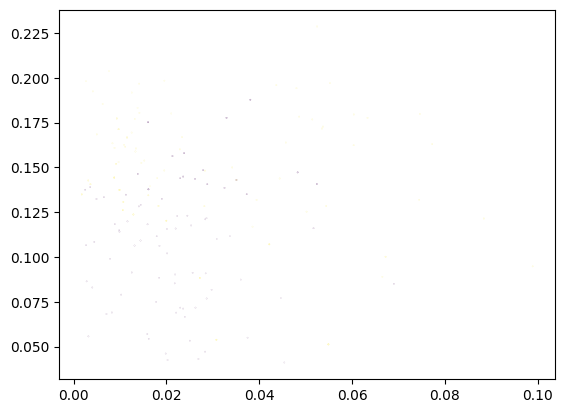

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from matplotlib.colors import ListedColormap


def tanh_derivative(x):
    return 1.0 - np.tanh(x) ** 2


def W_init(rows, col):
    input_dim = rows
    output_dim = col

    std_dev = np.sqrt(2 / (input_dim + output_dim))
    W = np.random.randn(input_dim, output_dim) * std_dev

    return W


def ada_boost_perceptron(X, labels, iter, l_rate):
    # Initialize the weights of all training examples to 1/N
    N = len(X[0])
    w = np.ones(N) / N

    # Initialize the list of weak learners and their weights
    weak_learners = []
    alphas = []

    for t in range(iter):
        # Train a single layer perceptron on the weighted training set
        weights, bias = perceptron(w, X, labels, l_rate=0.2, epochs=5000, tol=1e-4)
        perceptron_predict = lambda x: np.sign(np.dot(weights.T, x) + bias)
        weak_learners.append(perceptron_predict)

        # Compute the weighted error of the perceptron on the training set
        y_pred = perceptron_predict(X)
        err = np.sum(np.where(y_pred != labels, w, 0))

        # Compute the weight of the perceptron
        alpha = 0.5 * np.log((1 - err) / err)
        alphas.append(alpha)

        # Update the weights of the training examples
        labels1 = labels.flatten()
        y_pred = y_pred.flatten()
        w *= np.exp(-alpha * labels1 * y_pred)
        w /= np.sum(w)

    # Predict the class labels using the weighted sum of the weak learners
    y_pred = np.zeros((1, len(X[0])))
    for t in range(iter):
        y_pred += alphas[t] * weak_learners[t](X)
    return np.sign(y_pred), w


def perceptron(w, X, labels, l_rate, epochs, tol):
    weights = W_init(2, 1)
    biases = np.random.randn(1)

    for i in range(epochs):
        # Forward pass
        out = np.dot(weights.T, X) + biases
        out_activated = np.tanh(out)

        loss = labels - out_activated
        error1 = w * loss * tanh_derivative(out)

        if np.abs(np.mean(loss)) < tol:
            break

        weights += l_rate * np.dot(out_activated, error1.T)
        temp = np.sum(error1, axis=1, keepdims=True)
        biases += l_rate * temp[0, 0]

    return weights, biases


if __name__ == "__main__":
    file1 = loadmat('/content/trX.mat')
    file2 = loadmat('/content/trY.mat')
    trX = file1["trX"]
    trY = file2["trY"]

    y_pred, w = ada_boost_perceptron(trX, trY, iter=500, l_rate=0.06)
    correct = np.sum(np.where(y_pred == trY, 0, 1))
    accuracy = (correct/len(trX[0]))*100
    print('training accuracy is:', accuracy, '%')

    plt.scatter(trX[0], trX[1], s=w, c=trY)
    plt.show()

   

